In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
import clip
from PIL import Image

DATA_DIR = '/shared/jlin/gnlp_data/'
FRAMES_DIR = '/shared/jlin/gnlp_data/processed-frames/'
ENVS_DIR = '/shared/jlin/gnlp_data/envs/'
OBJ_ID = 5
ENV_ID = 0

In [7]:
frames = torch.from_numpy(torch.load(open('{}/obj{}-env{}-center-50x50.pt'.format(FRAMES_DIR, OBJ_ID, ENV_ID), 'rb')))

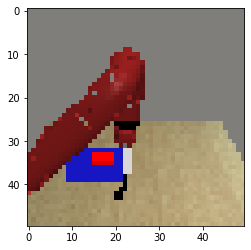

In [8]:
plt.imshow(frames[11].numpy().transpose(1,2,0))

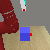

In [79]:
Image.fromarray(np.uint8(frames[0].numpy().transpose(1,2,0)*255))

In [80]:
descriptions = pickle.load(open('{}/{}_descr.pkl'.format(DATA_DIR, 'train'), 'rb'))

push the button on the toaster [0.1721  0.04633 0.09503 0.1667  0.0729  0.06137 0.0695  0.055   0.05167
 0.0826  0.0533  0.039   0.03442]
push the toaster lever [0.09357 0.055   0.1094  0.2542  0.2043  0.06635 0.06134 0.02087 0.0193
 0.04282 0.02478 0.02087 0.02722]
push the lever down in the toaster [0.1077  0.05334 0.1012  0.1921  0.0801  0.06238 0.0764  0.06046 0.0471
 0.08136 0.06046 0.04355 0.0339 ]
place the ball near wooden corner [0.1814  0.0104  0.03864 0.0793  0.03357 0.0756  0.0562  0.0971  0.0647
 0.1602  0.06573 0.07446 0.0627 ]
grab the red cube [0.3247  0.02316 0.0796  0.0759  0.02245 0.04327 0.053   0.06494 0.05734
 0.05386 0.07837 0.05823 0.06494]
slide the red cubical block to left [0.1246  0.05615 0.0667  0.0926  0.04514 0.0626  0.06073 0.07324 0.06168
 0.1017  0.1001  0.08044 0.0744 ]
press the red handle of the blue box [0.0783  0.0195  0.03214 0.09015 0.03265 0.08734 0.1006  0.11395 0.0808
 0.09015 0.08466 0.10376 0.086  ]
keep pressing the red button [0.10223 0.0

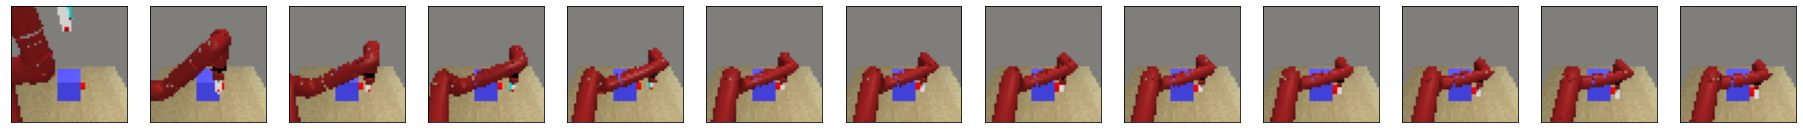

In [83]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
fig = plt.figure(figsize=(32, 32))
frame_skip = 10
columns = len(frames) // frame_skip + 1
rows = 1

images = []
for i in range(0, len(frames), frame_skip):
    image = Image.fromarray(np.uint8(frames[i].numpy().transpose(1,2,0)*255))
    fig.add_subplot(rows, columns, i//frame_skip+1)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.imshow(image)
    image = preprocess(image).unsqueeze(0).to(device)
    images.append(image)

images = torch.cat(images, 0)
text = clip.tokenize(descriptions[OBJ_ID]).to(device)

with torch.no_grad():
    logits_per_image, logits_per_text = model(images, text)
    probs = logits_per_text.softmax(dim=-1).cpu().numpy()

for i in range(probs.shape[0]):
    print(descriptions[OBJ_ID][i], probs[i])
    
print("Average: ", probs.mean(0))
plt.show()

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
descriptions = pickle.load(open('{}/{}_descr.pkl'.format(DATA_DIR, 'train'), 'rb'))
model, preprocess = clip.load("ViT-B/32", device=device)
for OBJ_ID in range(13):
    frames = torch.from_numpy(torch.load(open('{}/obj{}-env{}-center-50x50.pt'.format(FRAMES_DIR, OBJ_ID, ENV_ID), 'rb')))
    frame_skip = 10

    images = []
    for i in range(0, len(frames), frame_skip):
        image = Image.fromarray(np.uint8(frames[i].numpy().transpose(1,2,0)*255))
        image = preprocess(image).unsqueeze(0).to(device)
        images.append(image)

    images = torch.cat(images, 0)
    text = clip.tokenize(descriptions[OBJ_ID]).to(device)

    with torch.no_grad():
        logits_per_image, logits_per_text = model(images, text)
        probs = logits_per_text.softmax(dim=-1).cpu().numpy()

    print(str(OBJ_ID) + "_average: ", probs.mean(0))
    

0_average:  [0.1373  0.0807  0.1104  0.048   0.08844 0.1059  0.10834 0.04294 0.0756
 0.02574 0.07733 0.03873 0.06052]
1_average:  [0.082   0.1311  0.1403  0.0635  0.0789  0.06323 0.05817 0.06003 0.06744
 0.0625  0.05176 0.0506  0.04742 0.043  ]
2_average:  [0.259   0.12335 0.1276  0.2488  0.1195  0.1216 ]
3_average:  [0.08124 0.1492  0.1288  0.0834  0.0464  0.08563 0.05255 0.0927  0.0813
 0.0601  0.072   0.06665]
4_average:  [0.1259  0.04645 0.0851  0.1348  0.0671  0.0689  0.07855 0.0754  0.05862
 0.0844  0.066   0.05353 0.05536]
5_average:  [0.1261  0.1608  0.1571  0.11835 0.1278  0.1714  0.1385 ]
6_average:  [0.07764 0.079   0.0774  0.1025  0.11487 0.06836 0.06064 0.07874 0.09705
 0.08484 0.0825  0.07654]
7_average:  [0.2275  0.1176  0.08813 0.09076 0.1283  0.06805 0.0915  0.1881 ]
8_average:  [0.0909  0.1249  0.0808  0.05258 0.05313 0.05383 0.05045 0.0457  0.042
 0.0744  0.0382  0.0549  0.04987 0.1882 ]
9_average:  [0.04178 0.05075 0.02713 0.04367 0.04318 0.02711 0.0706  0.0692  0.0

[[0.363 0.637]]


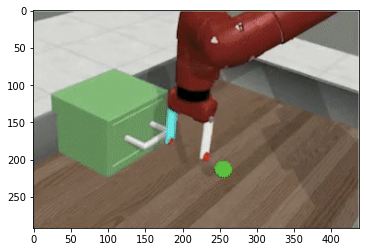

In [28]:
image = Image.open("close_drawer.png")
plt.imshow(image)

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

image = preprocess(image).unsqueeze(0).to(device)
text = clip.tokenize(['close drawer', 'open drawer']).to(device)

with torch.no_grad():
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print(probs)

[[0.4456 0.5547]]


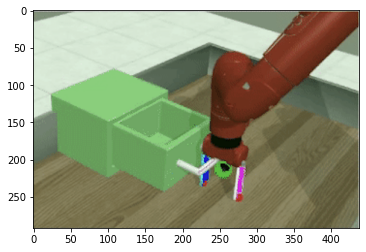

In [29]:
image = Image.open("open_drawer.png")
plt.imshow(image)

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

image = preprocess(image).unsqueeze(0).to(device)
text = clip.tokenize(['close drawer', 'open drawer']).to(device)

with torch.no_grad():
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print(probs)

[[0.566 0.434]]


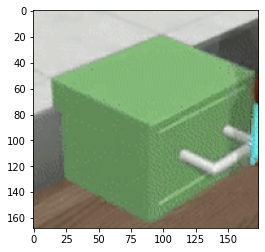

In [26]:
image = Image.open("close_drawer_without_robot.png")
plt.imshow(image)
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

image = preprocess(image).unsqueeze(0).to(device)
text = clip.tokenize(['close drawer', 'open drawer']).to(device)

with torch.no_grad():
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print(probs)

[[0.4377 0.562 ]]


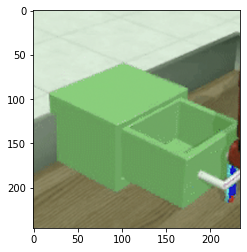

In [27]:
image = Image.open("open_drawer_without_robot.png")
plt.imshow(image)
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

image = preprocess(image).unsqueeze(0).to(device)
text = clip.tokenize(['close drawer', 'open drawer']).to(device)

with torch.no_grad():
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print(probs)